In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.colors as col
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator, LogLocator
import scipy.stats
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm, LinearSegmentedColormap
import matplotlib.lines as mlines
from plotpack import *
%matplotlib inline

# font size and style
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 45}
lines={'markersize': 7}

legsize = 30
axsize  = 22
marksize   = 7
majticklen = 20
minticklen = 10
tickwidth  = 5
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)

vtcol = ['black', 'tab:blue', 'skyblue','dimgray', 'darkgray', 'darkgreen']
labels = ['10', '25', '50', '100', '500']
lab_type = ["$\\rho_\mathrm{gr}= 800$","$\\rho_\mathrm{gr}= 400$","$\\rho_\mathrm{gr}= 100$"]
ls    = ['solid', 'dashed', 'dotted']


/tmp/ipykernel_9088/4032622361.py:11: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [5]:
directory = './input_files/'
oform     = '.dat'
var       = ['i', 'z', 'D', 'mtot', 'phi', 'vt', 'Re', 'T', 'p']
var_pin   = ['r_1000','vt_1000','r_750','vt_750','r_500','vt_500']
var_kp    = ['w_r_750','w_vt_750','w_r_500','w_vt_500','g8_r_500','g8_vt_500','g8_r_750','g8_vt_750', 'g4_r_500','g4_vt_500','g4_r_750','g4_vt_750', 'g1_r_500','g1_vt_500','g1_r_750','g1_vt_750']

files    = ['Pinsky_01_Fig2.csv', 'KhainPinsky_Fig1.csv', 'boehm_height_dep_prol' ]

pinsky    = pd.read_csv(directory+files[0], names=var_pin, header=1)
kp        = pd.read_csv(directory+files[1], names=var_kp,  header=1)

pinsky.reset_index(drop = True, inplace = True)
kp.reset_index(drop = True, inplace = True)
#print(pinsky['r_1000'])
lab_pres     = ['1000hPa','750hPa','500hPa']

In [6]:
directory2 = './experiments/r_depend/'
oform     = '.dat'
var       = ['i', 'z', 'D', 'mtot', 'phi', 'vt', 'Re', 'T', 'p']

files    = ['boehm_r_dep_1000_', 'boehm_r_dep_0800_','boehm_r_dep_0400_','boehm_r_dep_0100_' ]
pres     = ['1000hPa','0750hPa','0500hPa']

df = []

for ka in range(len(files)):
    if ka == 0:
        mini = 0
    else:
        mini = 1
    for j in range(mini,len(pres)):
        temp_df = pd.read_csv(directory2+files[ka]+pres[j]+oform, delimiter = " ", names=var)
        temp_df.reset_index(drop = True, inplace = True)
        df.append(temp_df)


1.2527127764925012


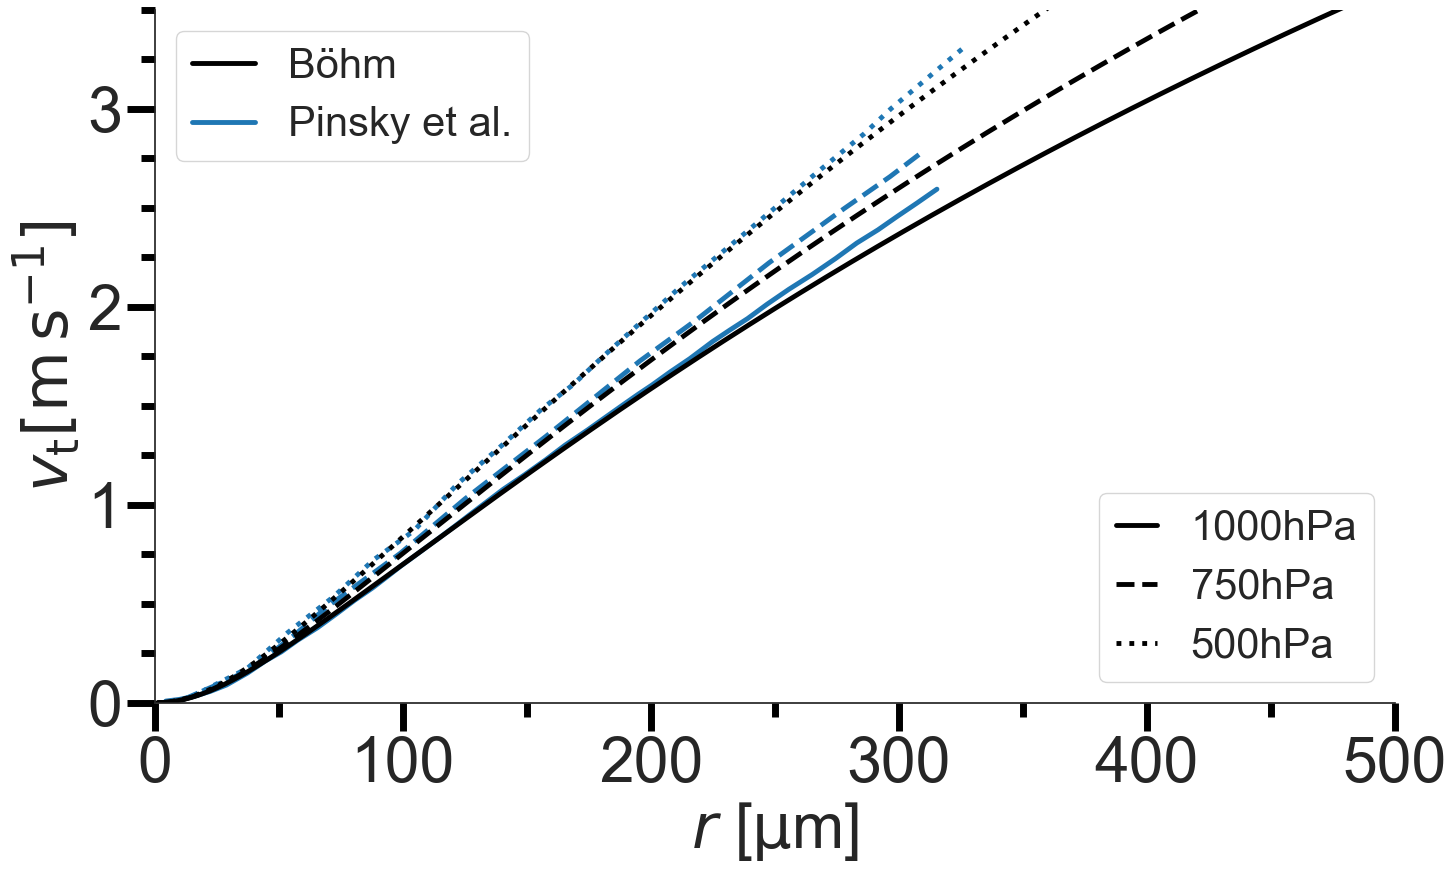

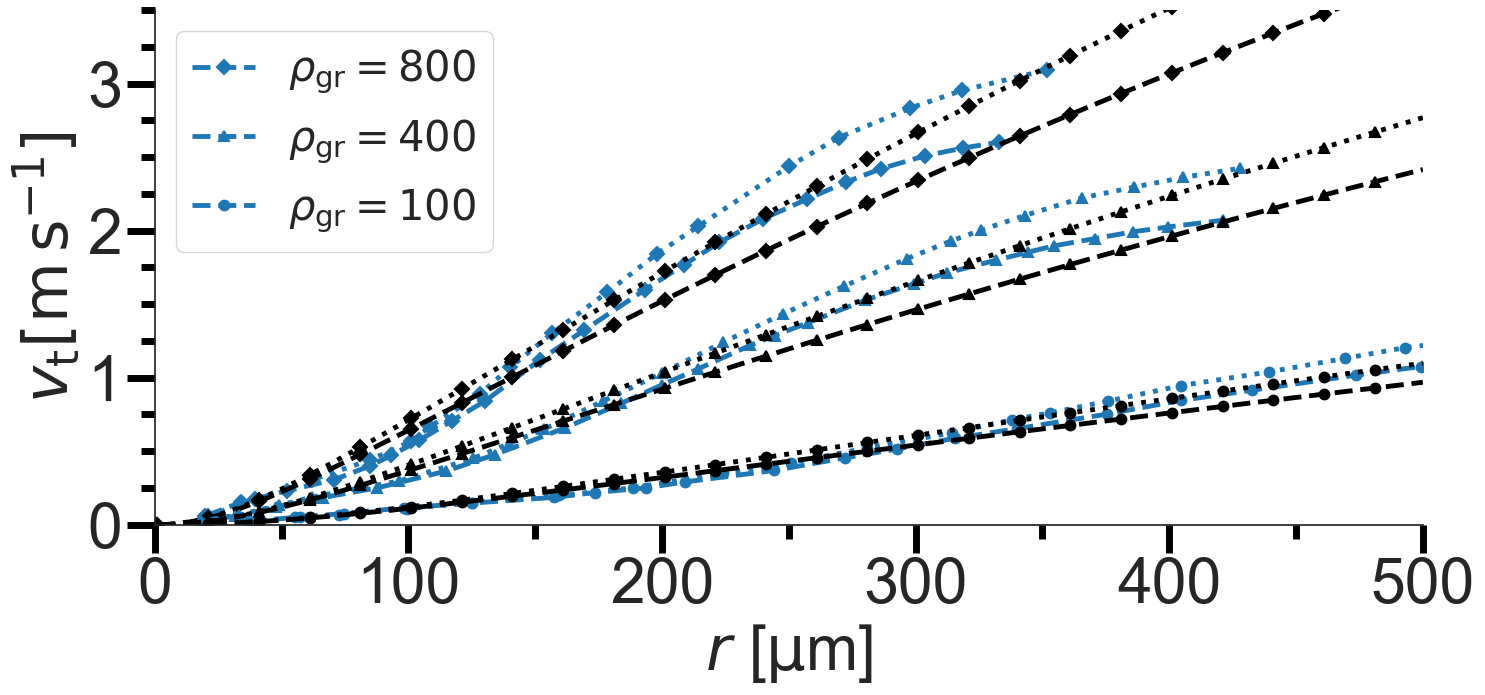

In [28]:
pp   = PdfPages('./PDFs/compare_h_dependency.pdf')
row, col = [1,1]
fig = plt.figure(figsize=(16*col,9*row))

ax1 = plt.subplot(row, col, 1)
ax1.set_xlabel('$r$ [$\mathrm{\mu}$m]')
ax1.set_ylabel('$v_\mathrm{t} \mathrm{[m\,s}^{-1}]$')

ax1.set_xlim(0,500)
ax1.set_ylim(0,3.5)

ax1.tick_params(axis='both', which='major', length=majticklen, width=tickwidth, color='black')
ax1.tick_params(axis='both', which='minor', length=minticklen, width=tickwidth, color='black')
ax1.yaxis.set_minor_locator(MultipleLocator(base = .250))
ax1.xaxis.set_minor_locator(MultipleLocator(base = 50))

wa, = ax1.plot(pinsky['r_1000'], pinsky['vt_1000'], c=vtcol[1],  linestyle=ls[0] )
ax1.plot(      kp['w_r_750'],  kp['w_vt_750'],      c=vtcol[1],  linestyle=ls[1] )
ax1.plot(      kp['w_r_500'],  kp['w_vt_500'],      c=vtcol[1],  linestyle=ls[2] )
for ni in range(3):
    mcs,= ax1.plot(df[ni]['D']/2.*1e6,  df[ni]['vt'],   c=vtcol[0],  linestyle=ls[ni], label=lab_pres[ni] )
    
leg = ax1.legend(fontsize = legsize,loc='lower right', ncol=1,columnspacing = 1, handlelength=1., frameon=True)
legend2 = ax1.legend([mcs,wa], ['Böhm', 'Pinsky et al.'], ncol=1, fontsize = legsize, columnspacing = 1, handlelength=1.5, loc="upper left", frameon=True)
for lh in legend2.legendHandles: 
    lh.set_linestyle('solid')
ax1.add_artist(leg)

pp.savefig(bbox_inches = 'tight', pad_inches = 0.5)

print(df[2]['vt'][294] / df[0]['vt'][294])
#print(np.amax(df[2]['vt']/df[0]['vt']))
#--------------------------------------------------------------------------------
row, col = [1,1]
fig = plt.figure(figsize=(16*col,9*row))

ax2 = plt.subplot(row, col, 1)
ax2.set_xlabel('$r$ [$\mathrm{\mu}$m]')
ax2.set_ylabel('$v_\mathrm{t} \mathrm{[m\,s}^{-1}]$')

ax2.set_xlim(0,500)
ax2.set_ylim(0,3.5)

ax2.tick_params(axis='both', which='major', length=majticklen, width=tickwidth, color='black')
ax2.tick_params(axis='both', which='minor', length=minticklen, width=tickwidth, color='black')
ax2.yaxis.set_minor_locator(MultipleLocator(base = .250))
ax2.xaxis.set_minor_locator(MultipleLocator(base = 50))

ge8, = ax2.plot(kp['g8_r_750'],  kp['g8_vt_750'],  c=vtcol[1], linestyle='dashed', marker='D' )
ax2.plot(kp['g8_r_500'],  kp['g8_vt_500'],  c=vtcol[1], linestyle='dotted', marker='D' )
for ni in range(3,5):
    mcs2,= ax2.plot(df[ni]['D']/2.*1e6,  df[ni]['vt'],   c=vtcol[0],  linestyle=ls[ni-2], label=lab_pres[ni-3], marker='D', markevery=20 )

ge4, =ax2.plot(kp['g4_r_750'],  kp['g4_vt_750'],  c=vtcol[1], linestyle='dashed', marker='^' )
ax2.plot(kp['g4_r_500'],  kp['g4_vt_500'],  c=vtcol[1], linestyle='dotted', marker='^' )
for ni in range(5,7):
    ax2.plot(df[ni]['D']/2.*1e6,  df[ni]['vt'],   c=vtcol[0],  linestyle=ls[ni-4], marker='^', markevery=20)

ge1, = ax2.plot(kp['g1_r_750'],  kp['g1_vt_750'],  c=vtcol[1], linestyle='dashed', marker='o' )
ax2.plot(kp['g1_r_500'],  kp['g1_vt_500'],  c=vtcol[1], linestyle='dotted', marker='o' )
for ni in range(7,9):
    ax2.plot(df[ni]['D']/2.*1e6,  df[ni]['vt'],   c=vtcol[0],  linestyle=ls[ni-6], marker='o', markevery=20)

leg = ax2.legend(fontsize = legsize,loc='upper left', ncol=1,columnspacing = 1, handlelength=1., frameon=True)
legend2 = ax2.legend([ge8, ge4, ge1], lab_type, ncol=1, fontsize = legsize, columnspacing = 1, handlelength=1.5, loc="upper left", frameon=True)
#ax1.add_artist(leg)

plt.tight_layout(rect=[0, 0.0, 1, 0.9])

pp.savefig(bbox_inches = 'tight', pad_inches = 0.5)
#fig.savefig('./PDFs/m2d_plots_IGF'+str(IGFt)+'_novent.png')
pp.close()
